## 1. train textCNN model
## 2. extract the middle layer Vector as document distribution presentation
## 3. dimension-reduction 
## 4. data visualization

In [1]:
! conda list

# packages in environment at /home/lothar/anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
_libgcc_mutex             0.1                        main  
absl-py                   0.9.0                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda                  2020.02                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.12                   py37_0  
anaconda-project          0.8.4                      py_0  
argh                      0.26.2                   py37_0  
asn1crypto                1.3.0                    py37_0  
astor                     0.8.1                    pypi_0    pypi
astroid                   2.3.3                    py37_0  
astropy                   4.0              py37h7b6447c_0  
astunparse                1.6.3                    pypi_0    pypi
atomicwrites        

In [7]:
import re
from bs4 import BeautifulSoup

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from gensim.models import KeyedVectors

ModuleNotFoundError: No module named 'gensim'

# import Job Description dataset

In [3]:
data = pd.read_csv(r'../Data/JD.csv',usecols = ['Query','Description'])
data

,Query,Description
0,Administrative Assistant,This Administrative Assistant position is resp...
1,Administrative Assistant,ADMINISTRATIVE ASSISTANT Part Time The West Or...
2,Administrative Assistant,Administrative Assistant - In Bus 26yrs Fashi...
3,Sales Representative,Are you ready for something new? Are you tired...
4,Customer Service Representative,Superior Staff Resources is currently seeking ...
...,...,...
72287,Business Analyst,ability construct complex sql statement analyz...
72288,Business Analyst,join u pursue disruptive new vision make machi...
72289,Business Analyst,duty high level independent decision making au...
72290,Business Analyst,crowdstrike leading provider next-generation e...


In [4]:
data.Query.value_counts()

Administrative Assistant                                      4395
Customer Service Representative                               4200
Own Your Own Franchise!                                       3701
Sales Representative                                          3556
Mobile Tool Sales / Franchise Distributor                     3275
Retail Wireless Sales Consultant                              3194
Sales / Franchise                                             3120
Project Manager                                               2845
Staff Accountant                                              2834
Retail Sales Associate                                        2769
Business Analyst                                              2420
Sales / Customer Service – Part or Full time – Summer Work    2419
Sales Representative / Account Manager /  Customer Service    2412
Senior Accountant                                             2216
Jani-King Franchise Business Opportunity                      

In [5]:
set(data.Query)

{'Account Executive',
 'Account Representative',
 'Administrative Assistant',
 'Benefits Consultant',
 'Business Analyst',
 'Cashier',
 'Customer Service - Sales Representative - Part Time Work',
 'Customer Service Representative',
 'Executive Assistant',
 'Financial Analyst',
 'Inside Sales Representative',
 'Jani-King Franchise Business Opportunity',
 'Java Developer',
 'Maintenance Technician',
 'Mobile Tool Sales / Franchise Distributor',
 'Own Your Own Franchise!',
 'Physical Therapist',
 'Project Manager',
 'Receptionist',
 'Restaurant Manager',
 'Retail Sales Associate',
 'Retail Wireless Sales Consultant',
 'Sales / Customer Service – Part or Full time – Summer Work',
 'Sales / Franchise',
 'Sales Management Trainee',
 'Sales Representative',
 'Sales Representative / Account Manager /  Customer Service',
 'Senior Accountant',
 'Staff Accountant',
 'Store Manager'}

# data clean

In [6]:
# BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_•]')

def text_clean(text):
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = text.replace('\\n', ' ').replace('\\r', ' ').replace('\\t', ' ').replace('\r', ' ').replace('\n', ' ').replace('\t', ' ').replace('\xa0',' ').replace('\uf0a7',' ').replace('•',' ').replace('#',' ')
    
#     text = BAD_SYMBOLS_RE.sub('', text)
    return text

def title_clean(text):
    text = text.split(r'/')[0].strip()
    return text

def string_process(l):
    temp_list = l.split()[:500]
    return temp_list

# output

In [7]:
index = random.randint( 0, len(data) )
text  = data['Description'][index]

text_clean(text)

"         as a business analyst in our corporate it department, you will responsible for understanding business needs, facilitating and documenting business requirements, developing current and future state process diagrams and developing prototypes to facilitate / validate business requirements and documenting use-cases required to support business requirements for application development.       responsibilities         analyze and research new and existing products, procedures, and workflow needs to develop current state and future state designs of the business.        identify, verify and document functional requirements using requirements management methodology and tools.        utilizing uml design methodology, capture use-cases for which the application/solution would need to support.        translate business strategies and objectives into business requirements; provide traceability of business requirements.        analyze, design/redesign, implement, and document business proce

In [8]:
data['Description'] = data['Description'].apply(text_clean)
data['Query'] = data['Query'].apply(text_clean).apply(title_clean)
data

,Query,Description
0,administrative assistant,this administrative assistant position is resp...
1,administrative assistant,administrative assistant part time the west or...
2,administrative assistant,administrative assistant - in bus 26yrs fashi...
3,sales representative,are you ready for something new? are you tired...
4,customer service representative,superior staff resources is currently seeking ...
...,...,...
72287,business analyst,ability construct complex sql statement analyz...
72288,business analyst,join u pursue disruptive new vision make machi...
72289,business analyst,duty high level independent decision making au...
72290,business analyst,crowdstrike leading provider next-generation e...


In [9]:
data.Query.value_counts()

sales representative                                        5968
sales                                                       5539
administrative assistant                                    4395
customer service representative                             4200
own your own franchise!                                     3701
mobile tool sales                                           3275
retail wireless sales consultant                            3194
project manager                                             2845
staff accountant                                            2834
retail sales associate                                      2769
business analyst                                            2420
senior accountant                                           2216
jani-king franchise business opportunity                    2196
benefits consultant                                         2049
store manager                                               2021
account representative   

In [10]:
data.Query.value_counts()

sales representative                                        5968
sales                                                       5539
administrative assistant                                    4395
customer service representative                             4200
own your own franchise!                                     3701
mobile tool sales                                           3275
retail wireless sales consultant                            3194
project manager                                             2845
staff accountant                                            2834
retail sales associate                                      2769
business analyst                                            2420
senior accountant                                           2216
jani-king franchise business opportunity                    2196
benefits consultant                                         2049
store manager                                               2021
account representative   

# sample

In [11]:
# import re
# from bs4 import BeautifulSoup
# import spacy
# nlp = spacy.load('en_core_web_sm')

def string_process(l):
    temp_list = l.split()[:500]
    return temp_list

In [12]:
data['text_clean'] = data['Description'].apply( string_process )
data

,Query,Description,text_clean
0,administrative assistant,this administrative assistant position is resp...,"[this, administrative, assistant, position, is..."
1,administrative assistant,administrative assistant part time the west or...,"[administrative, assistant, part, time, the, w..."
2,administrative assistant,administrative assistant - in bus 26yrs fashi...,"[administrative, assistant, -, in, bus, 26yrs,..."
3,sales representative,are you ready for something new? are you tired...,"[are, you, ready, for, something, new?, are, y..."
4,customer service representative,superior staff resources is currently seeking ...,"[superior, staff, resources, is, currently, se..."
...,...,...,...
72287,business analyst,ability construct complex sql statement analyz...,"[ability, construct, complex, sql, statement, ..."
72288,business analyst,join u pursue disruptive new vision make machi...,"[join, u, pursue, disruptive, new, vision, mak..."
72289,business analyst,duty high level independent decision making au...,"[duty, high, level, independent, decision, mak..."
72290,business analyst,crowdstrike leading provider next-generation e...,"[crowdstrike, leading, provider, next-generati..."


In [13]:
# load the Stanford GloVe model
filename = r'../word2vec/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [14]:
word2idx = {"PAD": 0,"UNK": 1}
vocab_list = [(k, model.wv[k]) for k, v in model.wv.vocab.items()]

embeddings_matrix = np.zeros((len(model.wv.vocab.items()) + 2, model.vector_size))
for i in range(len(vocab_list)):
    word = vocab_list[i][0]
    word2idx[word] = i + 2
    embeddings_matrix[i + 2] = vocab_list[i][1]
    
embeddings_matrix[1] = np.mean(embeddings_matrix, axis=0)

/home/lothar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/lothar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [15]:
max_seq_length = 500

In [16]:
def PreProcessInputData( text ):
    word_labels = []

    for sequence in text:
        len_text = len(sequence)

        ###########################################
        temp_word_labels = [ word2idx.get( str(w).lower(),1 ) for w in sequence ]
        ###########################################
        
        temp_word_labels = temp_word_labels + [0] * ( max_seq_length - len_text )
        word_labels.append( temp_word_labels )

    return word_labels

In [17]:
def get_argmax( l ):
    return np.argmax(l)

In [18]:
XX = np.array( PreProcessInputData( data['text_clean'] ) )
YY = pd.get_dummies(data['Query']).values

In [19]:
data['category'] = list( YY )
data['category'] = data['category'].apply( get_argmax )
data

,Query,Description,text_clean,category
0,administrative assistant,this administrative assistant position is resp...,"[this, administrative, assistant, position, is...",2
1,administrative assistant,administrative assistant part time the west or...,"[administrative, assistant, part, time, the, w...",2
2,administrative assistant,administrative assistant - in bus 26yrs fashi...,"[administrative, assistant, -, in, bus, 26yrs,...",2
3,sales representative,are you ready for something new? are you tired...,"[are, you, ready, for, something, new?, are, y...",24
4,customer service representative,superior staff resources is currently seeking ...,"[superior, staff, resources, is, currently, se...",7
...,...,...,...,...
72287,business analyst,ability construct complex sql statement analyz...,"[ability, construct, complex, sql, statement, ...",4
72288,business analyst,join u pursue disruptive new vision make machi...,"[join, u, pursue, disruptive, new, vision, mak...",4
72289,business analyst,duty high level independent decision making au...,"[duty, high, level, independent, decision, mak...",4
72290,business analyst,crowdstrike leading provider next-generation e...,"[crowdstrike, leading, provider, next-generati...",4


In [6]:
temp_DF = data[['Query','category']].drop_duplicates()

category_dict = {}
for ind, row in temp_DF.iterrows():
    category_dict[ row['category'] ] = row['Query']

category_dict

NameError: name 'data' is not defined

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split( XX,YY, test_size = 0.2, random_state = 42)
print( X_train.shape, Y_train.shape )
print( X_test.shape, Y_test.shape )

(57833, 500) (57833, 28)
(14459, 500) (14459, 28)


In [5]:
len( set( data['Query'] ) )

NameError: name 'data' is not defined

In [4]:
data

NameError: name 'data' is not defined

# textCNN  Embeding

In [1]:
feature_size = max_seq_length
dropout_rate = 0.2
num_classes  = len( set( data['Query'] ) )

inputs = keras.Input(shape=(500,), name='input_data')

embed = keras.layers.Embedding(
    len(embeddings_matrix), 
    100,
    weights=[embeddings_matrix],
    trainable=False,
    mask_zero=True,
    input_length=XX.shape[1]
    )(inputs)

embed = keras.layers.Reshape((500, 100, 1), name='add_channel')(embed)

pool_outputs = []
for filter_size in [3,4,5]:
    filter_shape = (filter_size, 100)
    conv = keras.layers.Conv2D(200, filter_shape, strides=(1, 1), padding='valid',
                               data_format='channels_last', activation='relu',
                               kernel_initializer='glorot_normal',
                               bias_initializer=keras.initializers.constant(0.1),
                               name='convolution_{:d}'.format(filter_size))(embed)
    max_pool_shape = (feature_size - filter_size + 1, 1)
    pool = keras.layers.MaxPool2D(pool_size=max_pool_shape,
                                  strides=(1, 1), padding='valid',
                                  data_format='channels_last',
                                  name='max_pooling_{:d}'.format(filter_size))(conv)
    pool_outputs.append(pool)

pool_outputs = keras.layers.concatenate(pool_outputs, axis=-1, name='concatenate')
pool_outputs = keras.layers.Flatten(data_format='channels_last', name='flatten')(pool_outputs)
pool_outputs = keras.layers.Dropout(dropout_rate, name='dropout')(pool_outputs)

outputs = keras.layers.Dense(num_classes, activation='softmax',
                             kernel_initializer='glorot_normal',
                             bias_initializer=keras.initializers.constant(0.1),
                             name='dense')(pool_outputs)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

NameError: name 'data' is not defined

In [29]:
epochs = 2
batch_size = 256

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.25,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 43374 samples, validate on 14459 samples
Epoch 1/2
43374/43374 [==============================] - 161s 4ms/sample - loss: 0.5780 - accuracy: 0.8384 - val_loss: 0.2385 - val_accuracy: 0.9111
Epoch 2/2
43374/43374 [==============================] - 165s 4ms/sample - loss: 0.2332 - accuracy: 0.9206 - val_loss: 0.1956 - val_accuracy: 0.9290


In [25]:
accr = model.evaluate(X_test,Y_test)

print( "Loss:",accr[0]," Accuracy:",accr[1] )

14459/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss: 0.2109905520294438  Accuracy: 0.92489105


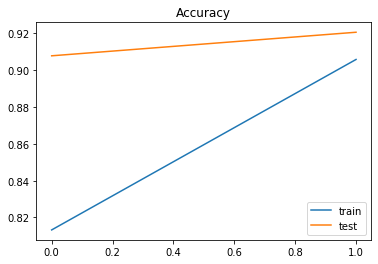

In [26]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [27]:
XX.shape

(72292, 500)

In [36]:
feature_size = max_seq_length
dropout_rate = 0.2


# network_structure = {
#     'is_embeding_layer_trainable'  : True,
#     'LSTM_layer'    : 3,
#     'node_number'   : 128,
#     'dropout_rate'  : 0.2,
#     'optimizer'     : 'adam',
#     'learning_rate' : 0.001
# #      'active_func'  :,
# }

network_structure = {
    'is_trainable' : True,
    'filter_size_list'   : [3,4,5],
    'filter_number_list' : [50,50,50],

    'dropout_rate' : 0.2,
    'optimizer' : 'adam',
    'active_func'  : 'relu',
    'learing_rate' : 0.001
}


def build_model( network_structure ):

    inputs = keras.Input(shape=(500,), name='input_data')

    embed = keras.layers.Embedding(
        len(embeddings_matrix), 
        100,
        weights=[embeddings_matrix],
        trainable= network_structure['is_trainable'] ,
        mask_zero=True,
        input_length=XX.shape[1]
        )(inputs)

    embed = keras.layers.Reshape((500, 100, 1), name='add_channel')(embed)

    pool_outputs = []
    
    for i in range( len(network_structure['filter_size_list']) ):
        filter_size  = network_structure['filter_size_list'][i]
        
        filter_shape = (filter_size, 100)
        
        # network_structure['filter_number_list'][i]
        conv = keras.layers.Conv2D(  50, filter_shape, strides=(1, 1), padding='valid',
                                   data_format='channels_last', activation='relu',
                                   kernel_initializer='glorot_normal',
                                   bias_initializer=keras.initializers.constant(0.1),
                                   name='convolution_{:d}'.format(filter_size))(embed)
        
        max_pool_shape = (feature_size - filter_size + 1, 1)
        pool = keras.layers.MaxPool2D(pool_size=max_pool_shape,
                                      strides=(1, 1), padding='valid',
                                      data_format='channels_last',
                                      name='max_pooling_{:d}'.format(filter_size))(conv)
        
        pool_outputs.append(pool)

    pool_outputs = keras.layers.concatenate(pool_outputs, axis=-1, name='concatenate')
    pool_outputs = keras.layers.Flatten(data_format='channels_last', name='flatten')(pool_outputs)
    pool_outputs = keras.layers.Dropout(network_structure['dropout_rate'], name='dropout')(pool_outputs)

#     outputs = keras.layers.Dense( 500 , activation='softmax',
#                                  kernel_initializer='glorot_normal',
#                                  bias_initializer=keras.initializers.constant(0.1),
#                                  name='represent_layer')(pool_outputs)


    outputs = keras.layers.Dense( len( set( data['Query'] ) ) , activation='softmax',
                                 kernel_initializer='glorot_normal',
                                 bias_initializer=keras.initializers.constant(0.1),
                                 name='dense')(pool_outputs)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer= network_structure['optimizer'], metrics=['accuracy'])
    
    return model

In [37]:
model = build_model( network_structure )
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.25,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 43374 samples, validate on 14459 samples
Epoch 1/2
43374/43374 [==============================] - 321s 7ms/sample - loss: 0.6085 - accuracy: 0.8315 - val_loss: 0.2262 - val_accuracy: 0.9171
Epoch 2/2
43374/43374 [==============================] - 323s 7ms/sample - loss: 0.2201 - accuracy: 0.9227 - val_loss: 0.1895 - val_accuracy: 0.9299


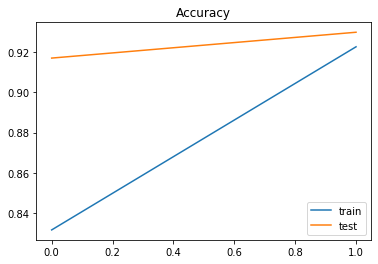

In [38]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [30]:
from tensorflow.keras import layers


# feature_size = max_seq_length
num_classes  = len( set( data['Query'] ) )

inputs = keras.Input(shape=(500,), name='input_data')

embed = keras.layers.Embedding(
    len(embeddings_matrix), 
    100,
    weights=[embeddings_matrix],
    trainable=False,
    mask_zero=True,
    input_length=XX.shape[1]
    )(inputs)


x = layers.Conv1D(128, 5, activation="relu",kernel_initializer='glorot_normal',
                                   bias_initializer=keras.initializers.constant(0.1))(embed)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu",kernel_initializer='glorot_normal',
                                   bias_initializer=keras.initializers.constant(0.1))(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu",kernel_initializer='glorot_normal',
                                   bias_initializer=keras.initializers.constant(0.1))(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense( num_classes , activation="softmax")(x)
model = keras.Model( inputs, outputs )
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

# model = build_model( network_structure )
epochs = 2
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.25,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])




# feature_size = max_seq_length
# dropout_rate = 0.2
# num_classes  = len( set( data['Query'] ) )


# pool_outputs = []
# for filter_size in [3,4,5]:
#     filter_shape = (filter_size, 100)
#     conv = keras.layers.Conv2D(50, filter_shape, strides=(1, 1), padding='valid',
#                                data_format='channels_last', activation='relu',
#                                kernel_initializer='glorot_normal',
#                                bias_initializer=keras.initializers.constant(0.1),
#                                name='convolution_{:d}'.format(filter_size))(embed)
#     max_pool_shape = (feature_size - filter_size + 1, 1)
#     pool = keras.layers.MaxPool2D(pool_size=max_pool_shape,
#                                   strides=(1, 1), padding='valid',
#                                   data_format='channels_last',
#                                   name='max_pooling_{:d}'.format(filter_size))(conv)
#     pool_outputs.append(pool)

# pool_outputs = keras.layers.concatenate(pool_outputs, axis=-1, name='concatenate')
# pool_outputs = keras.layers.Flatten(data_format='channels_last', name='flatten')(pool_outputs)
# pool_outputs = keras.layers.Dropout(dropout_rate, name='dropout')(pool_outputs)

# outputs = keras.layers.Dense(num_classes, activation='softmax',
#                              kernel_initializer='glorot_normal',
#                              bias_initializer=keras.initializers.constant(0.1),
#                              name='dense')(pool_outputs)

# model = keras.Model(inputs=inputs, outputs=outputs)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

Train on 43374 samples, validate on 14459 samples
Epoch 1/2
43374/43374 [==============================] - 114s 3ms/sample - loss: 0.9138 - accuracy: 0.7057 - val_loss: 0.3816 - val_accuracy: 0.8611
Epoch 2/2
43374/43374 [==============================] - 116s 3ms/sample - loss: 0.3186 - accuracy: 0.8871 - val_loss: 0.2790 - val_accuracy: 0.8962


In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(500,), name='input_data')

x = keras.layers.Embedding(
    len(embeddings_matrix), 
    100,
    weights=[embeddings_matrix],
    trainable=False,
    mask_zero=True,
    input_length=XX.shape[1]
    )(inputs)


x = layers.Conv1D(128, 5, activation="relu",kernel_initializer='glorot_normal',
                                   bias_initializer=keras.initializers.constant(0.1))(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu",kernel_initializer='glorot_normal',
                                   bias_initializer=keras.initializers.constant(0.1))(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu",kernel_initializer='glorot_normal',
                                   bias_initializer=keras.initializers.constant(0.1))(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense( num_classes , activation="softmax")(x)
model = keras.Model( inputs, outputs )
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

# model = build_model( network_structure )
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.25,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 43374 samples, validate on 14459 samples
Epoch 1/2
43374/43374 [==============================] - 114s 3ms/sample - loss: 0.9328 - accuracy: 0.6975 - val_loss: 0.3884 - val_accuracy: 0.8620
Epoch 2/2
43328/43374 [============================>.] - ETA: 0s - loss: 0.3233 - accuracy: 0.8848

In [36]:
for i in range(3):
    print(i)

0
1
2


In [ ]:
network_structure = {
    'is_trainable' : True,
    'filter_layer_number'   : 5,
    'node_number' : 128,

    'dropout_rate' : 0.2,
    'optimizer' : 'adam',
    'active_func'  : 'relu',
    'learing_rate' : 0.001
}


def build_model( network_structure ):

    inputs = keras.Input(shape=(500,), name='input_data')

    x = keras.layers.Embedding(
        len(embeddings_matrix), 
        100,
        weights=[embeddings_matrix],
        trainable= network_structure['is_trainable'] ,
        mask_zero=True,
        input_length=XX.shape[1]
        )(inputs)
    

    for i in range( 3 ):
        x = layers.Conv1D(128, 5, activation="relu",padding='SAME')(x)
        x = layers.MaxPooling1D(5)(x)
    

    x = layers.Conv1D(128, 5, activation="relu",padding='SAME')(x)
    x = layers.GlobalMaxPooling1D()(x)

    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout( network_structure['dropout_rate'] )(x)

    outputs = layers.Dense( num_classes , activation="softmax")(x)
    model = keras.Model( inputs, outputs )
    model.compile(loss='categorical_crossentropy', optimizer=network_structure['optimizer'], metrics=['accuracy'])

#     model.summary()
    return model


batch_size = 64
model = build_model( network_structure )
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.25,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 43374 samples, validate on 14459 samples
Epoch 1/2
37760/43374 [=========================>....] - ETA: 37s - loss: 0.9369 - accuracy: 0.7041

# random 500 data
# extract middle layer as document distribution presentation

In [ ]:
import random
import tensorflow as tf

x_list = []
y_list = []

index = 0
while True:
    if index >= 3000:
        break
    
    try:
        ranIndex = random.randint( 0,len( XX ) )

        layer_output = model.get_layer('represent_layer').output
        intermediate_model = tf.keras.models.Model(inputs=model.input,outputs=layer_output)
        intermediate_prediction = intermediate_model.predict( XX[ranIndex:ranIndex+1] )

        Y_index = YY[ranIndex:ranIndex+1]

        # print( YY )
#         print( data['text_clean'][ranIndex] )
#         print()
#         print( data['Query'][ranIndex] )
#         print()

#         print( intermediate_prediction[0][0][0] )
        x_list.append( intermediate_prediction[0][0][0] )
#         y_list.append( data['Query'][ranIndex] )
        y_list.append( YY[ranIndex] )
#         print()
        index += 1

    except:
        print( 'Error' )

In [ ]:
c_list = [ np.argmax(y) for y in y_list ]

# t-sne visualization

In [ ]:
category_dict

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
 
X_tsne = TSNE(learning_rate=100).fit_transform( x_list )

fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111)

ind = 0

label_list = []
for tem in X_tsne:
    if c_list[ind] not in label_list:
        ax.plot( tem[0], tem[1],label = category_dict[c_list[ind]]  )
        label_list.append( c_list[ind] )
        
    ind +=1

plt.scatter( X_tsne[:, 0], X_tsne[:, 1], c=c_list )
plt.legend()